## Breast Cancer Dataset
Using sklearn built-in datasets, lets demonstrate process of Data Analysis after Fitting Model

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the dataset to print the first few rows
df = pd.DataFrame(data.data, columns=data.feature_names)

print("First few rows of the breast cancer dataset:")
print(df.head())

First few rows of the breast cancer dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  w

### Checklist:
- Duplicates
- Replicates
- Outliers
- Standardize

In [10]:
# Check for duplicates
df = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df.head())


After removing duplicates:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wor

In [15]:
# Standardize the data using StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X, y = data.data, data.target
df_scaled = scaler.fit_transform(X)
print("\nAfter standardizing the data:")

print(df_scaled[:5])  # Print first 5 rows of scaled data



After standardizing the data:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889

In [19]:
# Handle Outliers
# Calculate Q1 and Q3 for the column of interest
Q1 = df['mean radius'].quantile(0.25)
Q3 = df['mean radius'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Remove outliers
df = df[(df['mean radius'] >= (Q1 - 1.5 * IQR)) & (df['mean radius'] <= (Q3 + 1.5 * IQR))]

print("\nAfter removing outliers:")
print(df.head())


After removing outliers:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst

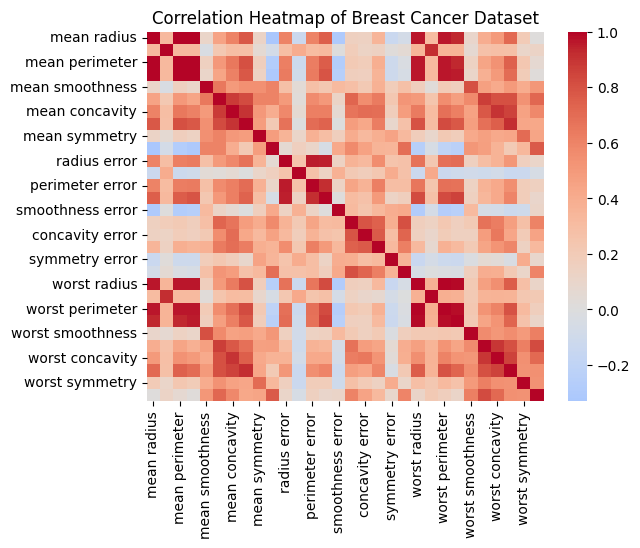

In [22]:
# Visualize the data
sns.heatmap(df.corr(), center=0, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()